<a href="https://colab.research.google.com/github/adhishagc/Genetic-Algorithm-using-Python-Example/blob/master/Genetic_Algorithm_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Table of Contents**

---


1.   **Importing Libraries**
2.   **Access to Google Drive**
3.**Function Definitions**
4. **Running the Model**





### **Initialization**


1.   Import of Libraries
2.   Access to Google Drive
3. Load the Dataset
4. View the Dataset as a Dataframe



In [0]:
#importing libraries
import pandas as pd
import numpy as np
import random as random
from matplotlib import pyplot as plt
import time

In [0]:
#Access to google drive. The Video Store dataset was uploaded to google drive.
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#The dataset is load dataset to a dataframe
df = pd.read_csv('/content/gdrive/My Drive/Genetic Algorithms/Assignment 01/dataset.csv')

In [0]:
#view dataset
df

,file,size,duration
0,1,800,121
1,2,700,95
2,3,650,85
3,4,750,100
4,5,600,78
5,6,900,125
6,7,950,130
7,8,875,128
8,9,1050,135
9,10,1500,120


### **Population Creation Function**
A dataframe which consists of the entire population is returned when this function is called. The structure would be of 1 column to label the chromosome number and the remaining 10 columns will represent the file number of the dataset. The returned dataframe (population) will consist of random 0 or 1 values in the  chromosome.

In [0]:
# function for init population
def createInitPop(popSize):
  #array of data to represent the chromosomes and random file labellings
  values ={
    'chromosome':[i for i in range(1,popSize+1)],
    'file 1':[random.randint(0, 1) for _ in range(popSize)],
    'file 2':[random.randint(0, 1) for _ in range(popSize)],
    'file 3':[random.randint(0, 1) for _ in range(popSize)],
    'file 4':[random.randint(0, 1) for _ in range(popSize)],
    'file 5':[random.randint(0, 1) for _ in range(popSize)],
    'file 6':[random.randint(0, 1) for _ in range(popSize)],
    'file 7':[random.randint(0, 1) for _ in range(popSize)],
    'file 8':[random.randint(0, 1) for _ in range(popSize)],
    'file 9':[random.randint(0, 1) for _ in range(popSize)],
    'file 10':[random.randint(0, 1) for _ in range(popSize)],
  }
  #convert the array of population to a dataframe
  values = pd.DataFrame(values)
  
  #return the dataframe
  return values

### **Evaluate Fitness Function**

\begin{equation}
f(x_i) = \textrm{Playing time of video file of } x_i
\end{equation}

\begin{equation}
g(x_i) = \textrm{File size of video file of } x_i
\end{equation}

**Objective Function**
\begin{equation}
\textrm{Maximize }\sum f(x_i) \textrm{ such that } \sum g(x_i)<=4500
\end{equation}

In [0]:
#Evaluate Fitness Function
def EvaluateFitness(chromosome,df,popSize):
  #fitness array
  fitness = {
      'chromosome':[x for x in range(1,popSize+1)],
      'fitness':[0 for x in range(0,popSize)]
  }
  
  #size array
  filesize = {
      'chromosome':[x for x in range(1,popSize+1)],
      'size':[0 for x in range(0,popSize)]
  }

  #convert to dataframe
  fitness = pd.DataFrame(fitness)
  filesize = pd.DataFrame(filesize)

  #total file size and duration PER Solution
  size=0
  duration=0
  
  #implementation of the Fitness Function
  # i navigates the rows while the j navigates the file1, file2 ... columns in the chromosome.
  for i in range(popSize):
    for j in range(1,11):
      #navigate through each chromosome in the population and check for the cells which contains a file, that is 1 value in the cell.
      
      if(chromosome.iloc[i,j] ==1):
        #if it contains any file in the cell(that is a 1 value) the size and the duration of the solution is calculated by comparing the dataset.
        size += df.iloc[j-1,1]
        duration +=df.iloc[j-1,2]
    
    #calculation of the fitness and the total file size of the entire population
    if(size<=4500):
      #these values are potential solutions since the size is less than 4500.
      #respective fitness and filesizes are added to the dataframe
      fitness.loc[i,'fitness'] = duration
      filesize.loc[i,'size'] = size
      
    else:
      #These will be non solutions. Therefore the fitness is reduced by multiplying by 0.5
      #The file size is stored
      fitness.loc[i,'fitness'] = duration*0.5
      filesize.loc[i,'size'] = size
      
    #The PER solution size and duration values are reset
    size = 0
    duration = 0
  
  #The entire fitness and filesize of the population is returned as a DataFrame
  return fitness, filesize      

### **Rank Selection Function**

In [0]:
#Rank Selection Function
def rankSelection(chromosome,fitness,popSize):
  #Total integer value from 0 to population size 
  rankTotal = sum(x for x in range(0,popSize))
  
  #A random value inbetween 0 and above value
  totRandom = random.uniform(0,1)*rankTotal
  
  #variable to store the accumilation of fitness values
  tot=0
  #sorting the fitness dataframe having the lowest on the top and the highest in the bottom
  fitness_sorted = fitness.sort_values(by=['fitness'])
  
  for i in fitness_sorted.index:
    #accumilation of the fitness values till the accumilation is equal to the random total generated
    tot += fitness_sorted.loc[i,'fitness']
    if(tot>=totRandom):
      global fifo_index
      fifo_index = i
      
      #returning the chromosome(as a parent selected) and the respective value i where the accumilation stopped. 
      selected_parent = chromosome.loc[i,:]
      selected_parent_id = i
      
      return selected_parent,selected_parent_id

### **Binary Represented N Point Crossover Function Generalized**
The function has generalized the Single Point Crossover and the N-Point Crossover operators.
When :
\begin{equation}
n = 1...n \textrm{ which is the n-point}
\end{equation}
is passed as a parameter it the function it acts as a single point crossover and for the rest as an n point crossover. Also the :
\begin{equation}
p_c = 0.8 \textrm{ or etc, crossover rate}
\end{equation}
would be the crossover rate for the function.


In [0]:
def binary_rep_n_point_crossover(n,parent1,parent2,pc):
  
  parent1_parts = [] #this list contains parent 1 partwise split sections based on the random values generated
  parent2_parts = [] #this list contains parent 2 partwise split sections based on the random values generated
  random_vals = [] #list to store the generated random values
  start_pos = 0 #start position of the spiliting parents
  random_position = start_pos+1 #initial random position
  L_1 = 10-1 # the random value range should be in between 1 to 10-1 which is L-1

  parent1_array = parent1.values
  parent2_array = parent2.values

  if(random.uniform(0,1)>=pc):
    #crossover takes place
    count = 1

    for n_times in range(n+1):
      #random position is generated here. This random position will be the place
      #where the chromosome will be split
      random_position = random.randint(random_position,L_1)

      #The generated random values are stored in this list
      random_vals.append(random_position)


      if(n_times == n):
        parent1_parts.append(parent1_array[start_pos:L_1+1])
        parent2_parts.append(parent2_array[start_pos:L_1+1])

      else:

        parent1_parts.append(parent1_array[start_pos:random_position])
        parent2_parts.append(parent2_array[start_pos:random_position])

      start_pos = random_position
      #random_position +=1


    for i in range(len(parent1_parts)):
      if(count%2==0):
        temp = parent1_parts[i]
        parent1_parts[i] = parent2_parts[i]
        parent2_parts[i] = temp
        count +=1
      else:
        #nothing
        count += 1


    offspring1_array = np.concatenate(([parent1_parts[i] for i in range(len(parent1_parts))]))
    offspring2_array = np.concatenate(([parent2_parts[i] for i in range(len(parent1_parts))]))
    return offspring1_array,offspring2_array
  
  else:
    return parent1_array,parent2_array 
  


### **BitFlip of the Mutation**
Bit flip is done based on a randomly generated array of numbers compared with the mutation rate variable. If the compared value is higher than the mutation rate bit value is flipped.
\begin{equation}
p_m = 0 .... 1  \textrm{ Mutation rate Variable}
\end{equation}

In [0]:
def bitflip(chromosome,pm):
  #generate random bit array
  bits = [random.uniform(0,1) for _ in range(10)] #range size is the number of files
  
  for i in range(10):
    if(bits[i]>=pm):
      if(chromosome[i] == 0):
        chromosome[i] = 1
      else:
        chromosome[i] = 0
  
  return chromosome
      

### **Supportive Functions**
These functions are used for retrieving individual chromosome information. Much used for debugging purposes.

1.   **getFitness** function retruns the fitness and the total size of the Chromosome
2.   **getDetails** function returns the total file size and the total duration of the Chromosome



In [0]:
def getFitness(chromosome):
  total_size = 0
  total_duration = 0
  
  for i in range(len(chromosome)):
    if(chromosome[i]==1):
      total_size += df.loc[i,'size']
      total_duration += df.loc[i,'duration']
  
  if(total_size>4500):
    fitness = total_duration*0.5
    return fitness,total_size
  else:
    fitness = total_duration
    
    return fitness,total_size

In [0]:
def getDetails(chromosome):
  total_size = 0
  total_duration = 0
  
  for i in range(len(chromosome)):
    if(chromosome[i]==1):
      total_size += df.loc[i,'size']
      total_duration += df.loc[i,'duration']
      
  return total_duration, total_size

### **Replace the Offspring with the Population**
Offspring is replaced based on age. That is the selected parents are replaced.



In [0]:
def replace_with_offspring(parent1_id,parent2_id,offspring1,offspring2):
  #Offspring is replaced based on age. That is the selected parents are replaced.
  chromosome.iloc[parent1_id,1:] = offspring1
  chromosome.iloc[parent2_id,1:] = offspring2

### **Iterate the Model**



In [0]:
def trainModel(n,n_point,p_c,p_m):
  #variable to count and display the current epoch
  epoch = 0
  fit = pd.DataFrame()
  filesize = pd.DataFrame()
  parent1 = pd.DataFrame()
  parent2 = pd.DataFrame()
  
  
  for i in range(n):
    #Fitness Evaluation
    fitness, totFileSize = EvaluateFitness(chromosome,df,popSize)
    
    #parent selection
    parent1, parent1_id = rankSelection(chromosome,fitness,popSize)
    parent2, parent2_id = rankSelection(chromosome,fitness,popSize)
    
    #offspring generation through crossover
    offspring1,offspring2 = binary_rep_n_point_crossover(n_point,parent1[1:],parent2[1:],p_c)
    
    #passing the generated offspring for mutation
    offspring1 = bitflip(offspring1,p_m)
    offspring2 = bitflip(offspring2,p_m)
    
    #replace parents
    replace_with_offspring(parent1_id,parent2_id,offspring1,offspring2)
    
    #display epoch
    print(epoch)
    epoch +=1
    
    #debugging purposes returning values
    fit = fitness
    filesize = totFileSize
    
    #return parent1,parent2,offspring1,offspring2
  return fit,filesize,parent1,parent2    


### **Run the Program**

In [0]:
#SCENE 01
#population size
popSize = 60 

#creation of population of Chromosomes
chromosome = createInitPop(popSize)

#fifo index relates to the index to be removed. -1 is the initial value
fifo_index = -1

#iteration and 
iterations = 100

#n point for crossover
n_point = 1
#crossover rate
p_c = 0.8
#mutation rate
p_m = 0.01

#Final population Duration and Size storage
finalDuration = []
finalSize = []


#train model
start = time.time()
fit,filesize,parent1,parent2 = trainModel(iterations,n_point,p_c,p_m)
end = time.time()
print("Population Size :" + str(popSize))
print("Iterations :" + str(iterations))
print("Elapsed time :" + str(end - start) + " seconds")

#Get Fitness and Size information for the Last Population
for i in range(popSize):
  duration,size = getFitness(chromosome.iloc[i,1:].values)
  finalDuration.append(duration)
  finalSize.append(size)
  

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
Population Size :60
Iterations :100
Elapsed time :6.842413663864136 seconds


In [0]:
#fit

In [0]:
parent1

chromosome    11
file 1         0
file 2         1
file 3         1
file 4         0
file 5         0
file 6         1
file 7         1
file 8         1
file 9         0
file 10        1
Name: 10, dtype: int64

In [0]:
parent2

chromosome    27
file 1         0
file 2         0
file 3         0
file 4         0
file 5         0
file 6         1
file 7         0
file 8         0
file 9         1
file 10        1
Name: 26, dtype: int64

In [0]:
finalDuration.index(max(finalDuration))

18

In [0]:
finalSize[finalDuration.index(max(finalDuration))]

4475

In [0]:
finalDuration[finalDuration.index(max(finalDuration))]

613

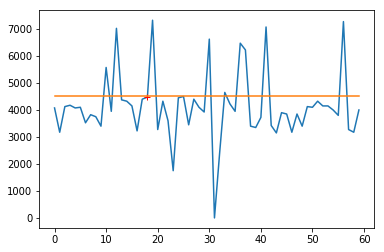

In [0]:
plt.plot([x for x in range(popSize)],[finalSize[x] for x in range(len(finalSize))])
plt.plot([finalDuration.index(max(finalDuration))],[finalSize[finalDuration.index(max(finalDuration))]],'r+')
plt.plot([x for x in range(popSize)],[4500 for x in range(len(finalSize))])

In [0]:
max(finalDuration)

613